In [11]:
%pip install matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: c:\Users\aymuo\.pyenv\pyenv-win\versions\3.12.0\python.exe -m pip install --upgrade pip


In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split                                #For splitting the data into train and test
from sklearn.ensemble import RandomForestClassifier                                 #For Random Forest Classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #For model evaluation
from sklearn.metrics import classification_report                                   #For classification report

from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer

In [13]:
df = pd.read_csv('./assignment4.csv')
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,target
0,-0.005545,32.771094,-2.885640,-5.706496,4.549712,8.549846,1.149038,7.110967,2.195233,-2.501506,...,4.766636,-1.013512,-4.120721,10.958604,23.640397,6.618708,5.185408,9.333989,25.452316,1
1,-7.843181,-31.177053,1.223093,0.788477,2.653031,-2.984817,17.933594,-7.733961,4.070209,6.155632,...,-5.259832,8.896424,0.279679,3.074111,-25.311549,-2.407999,5.082825,-4.524458,-6.542893,1
2,5.341004,-2.219577,-5.476145,-4.877195,13.104240,6.623179,-11.620419,-10.200323,-0.540033,-1.033903,...,-12.259527,-0.904153,2.373974,-5.779762,27.554678,3.560516,4.601109,-2.584374,24.237743,0
3,-7.886861,19.922849,8.813712,-5.075512,4.743370,7.943378,24.080336,1.961569,1.112989,0.917271,...,2.460425,5.374294,2.977644,0.028648,-12.681906,2.289113,-0.762222,-5.718011,9.672549,1
4,5.915363,-3.291119,-3.540508,2.653489,-5.730528,-2.816063,-8.230898,-4.454535,-0.225400,-3.410212,...,3.358961,1.495604,3.057157,-12.966752,-15.318971,5.361050,-0.445823,-6.580588,-46.121969,0


In [14]:
df.isnull().sum()

feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
feature_26    0
feature_27    0
feature_28    0
feature_29    0
feature_30    0
feature_31    0
feature_32    0
feature_33    0
feature_34    0
feature_35    0
feature_36    0
feature_37    0
feature_38    0
feature_39    0
feature_40    0
feature_41    0
feature_42    0
feature_43    0
feature_44    0
feature_45    0
feature_46    0
feature_47    0
feature_48    0
feature_49    0
feature_50    0
target        0
dtype: int64

In [15]:
X= df.drop(['target'],axis=1)
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12) # 80:20 split

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 50), (1000, 50), (4000,), (1000,))

In [17]:
sclr = StandardScaler()
X_train_scaled = sclr.fit_transform(X_train)
X_test_scaled = sclr.fit(X_test)

In [19]:
# Random Forest Classifier

model = RandomForestClassifier(random_state=12)

param_grid = {
    'n_estimators': [10, 100, 150 , 200],             # Number of trees in the forest
    'max_features': ['sqrt', 'log2'],           # The number of features to consider when looking for the best split
    'max_depth': [10, 20, 30],                  # The maximum depth of the tree (to find which one works best for the dataset)
    'bootstrap': [True, False],                 # Whether to sample data with replacement
    'min_samples_split': [2, 5, 10],            # Minimum samples required to split a node
    'criterion': ['gini', 'entropy']            # The function to measure the quality of a split (to find which one works best for the dataset)
}

# Grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print(f"Best Hyperparameters: {grid_search.best_params_}")   
print(f"Best Score: {grid_search.best_score_}")              
print(f"Best Estimator: {grid_search.best_estimator_}")

# Best estimator
best_model = grid_search.best_estimator_

# Model evaluation
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification report
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Hyperparameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.66175
Best Estimator: RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=30,
                       n_estimators=200, random_state=12)
Accuracy: 0.572
              precision    recall  f1-score   support

           0       0.79      0.51      0.62       492
           1       0.46      0.83      0.59       305
           2       0.50      0.33      0.40       203

    accuracy                           0.57      1000
   macro avg       0.58      0.56      0.54      1000
weighted avg       0.63      0.57      0.57      1000



c:\Users\aymuo\.pyenv\pyenv-win\versions\3.12.0\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [20]:
# Feature scores
feature_score = pd.Series(best_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_score

feature_8     0.025952
feature_47    0.024533
feature_30    0.024365
feature_29    0.024201
feature_16    0.024036
feature_17    0.023342
feature_10    0.023055
feature_42    0.022800
feature_4     0.022798
feature_25    0.022652
feature_49    0.022548
feature_18    0.022433
feature_7     0.022314
feature_3     0.022264
feature_14    0.022039
feature_36    0.021645
feature_46    0.021401
feature_26    0.021396
feature_27    0.021336
feature_43    0.020601
feature_13    0.020497
feature_22    0.020342
feature_6     0.020327
feature_23    0.020287
feature_1     0.020154
feature_34    0.020041
feature_35    0.019764
feature_20    0.019637
feature_28    0.019626
feature_32    0.019543
feature_38    0.019273
feature_12    0.019270
feature_37    0.019206
feature_40    0.018826
feature_24    0.018778
feature_21    0.018595
feature_48    0.018078
feature_2     0.017806
feature_5     0.017790
feature_11    0.017578
feature_15    0.017572
feature_39    0.017447
feature_45    0.017329
feature_33 

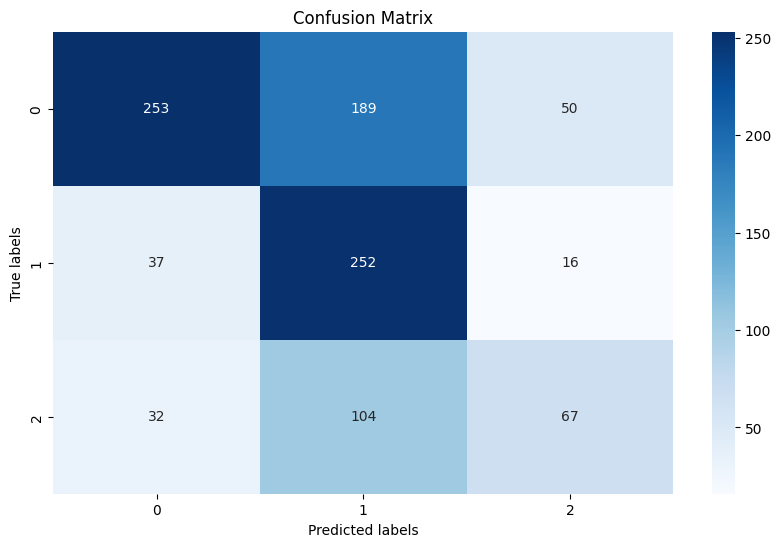

In [21]:
# Confusion matrix for the Random Forest Classifier
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Adaboost

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Hyperparameters: {'learning_rate': 1, 'n_estimators': 150}
Best Score: 0.50325
Best Estimator: AdaBoostClassifier(learning_rate=1, n_estimators=150, random_state=12)
Accuracy: 0.316
              precision    recall  f1-score   support

           0       0.73      0.02      0.03       492
           1       0.32      0.79      0.46       305
           2       0.28      0.33      0.30       203

    accuracy                           0.32      1000
   macro avg       0.44      0.38      0.26      1000
weighted avg       0.51      0.32      0.22      1000



c:\Users\aymuo\.pyenv\pyenv-win\versions\3.12.0\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


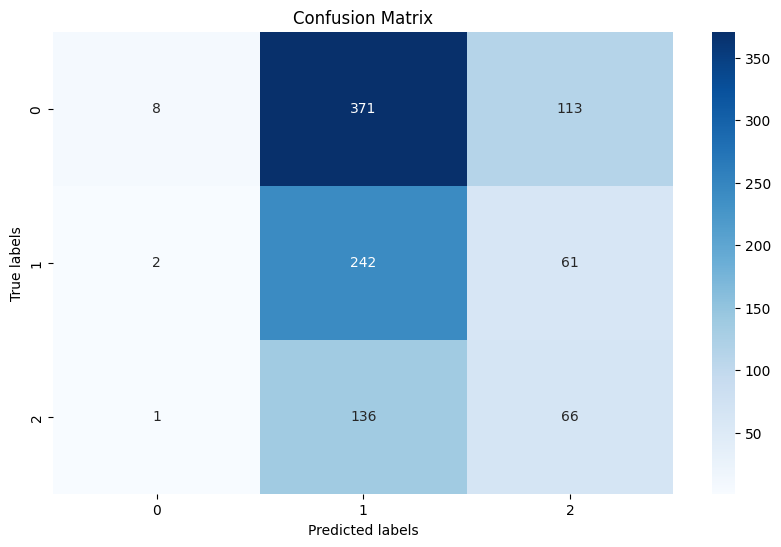

In [22]:
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.tree import DecisionTreeClassifier

# AdaBoost Classifier model with grid 
# Defining the model
# dtc = DecisionTreeClassifier(max_depth=1)
model4 = AdaBoostClassifier(random_state=12)

# Defining Hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],             # Number of trees in the forest                   # The base estimator from which the boosted ensemble is built
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1]  # Learning rate shrinks the contribution of each classifier
}

# Grid search
grid_search = GridSearchCV(estimator=model4, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print(f"Best Hyperparameters: {grid_search.best_params_}")   # Prints the best hyperparameter combination
print(f"Best Score: {grid_search.best_score_}")              # best cross-validation accuracy score
print(f"Best Estimator: {grid_search.best_estimator_}")      # Retrieves the best-tuned AdaBoost model

# Best estimator
best_model = grid_search.best_estimator_                     # Stores the best-tuned model (chosen by GridSearchCV) for evaluation

# Model evaluation
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification report
print(classification_report(y_test, y_pred,zero_division=1))  #If precision is undefined (division by zero), it sets the precision to 1 instead of 0.

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()